In [1]:
#try:
 # %tensorflow_version only exists in Colab.
  #!pip install tf-nightly
#except Exception:
 # pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2025-10-05 14:12:12--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.2’

train-data.tsv.2    100%[===================>] 349.84K  --.-KB/s    in 0.02s   

2025-10-05 14:12:12 (14.5 MB/s) - ‘train-data.tsv.2’ saved [358233/358233]

--2025-10-05 14:12:12--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.2’

valid-data.tsv.2    100%[========

In [3]:
train_data = pd.read_csv('train-data.tsv', sep='\t', header=None, names=['label', 'text'])
print(train_data.head())
print(train_data['label'].value_counts())

  label                                               text
0   ham  ahhhh...just woken up!had a bad dream about u ...
1   ham                           you can never do nothing
2   ham  now u sound like manky scouse boy steve,like! ...
3   ham  mum say we wan to go then go... then she can s...
4   ham  never y lei... i v lazy... got wat? dat day ü ...
label
ham     3619
spam     560
Name: count, dtype: int64


In [4]:
valid_data = pd.read_csv('valid-data.tsv', sep='\t', header=None, names=['label', 'text'])
print(valid_data.head())
print(valid_data['label'].value_counts())

  label                                               text
0   ham  i am in hospital da. . i will return home in e...
1   ham         not much, just some textin'. how bout you?
2   ham  i probably won't eat at all today. i think i'm...
3   ham  don‘t give a flying monkeys wot they think and...
4   ham                                who are you seeing?
label
ham     1205
spam     187
Name: count, dtype: int64


In [5]:
print("train/valid_data_null_before:\n", train_data.isnull().sum(), valid_data.isnull().sum())
train_data = train_data.dropna()
valid_data = valid_data.dropna()
print("train/valid_data_null_after:\n", train_data.isnull().sum(), valid_data.isnull().sum())

train/valid_data_null_before:
 label    0
text     0
dtype: int64 label    0
text     0
dtype: int64
train/valid_data_null_after:
 label    0
text     0
dtype: int64 label    0
text     0
dtype: int64


In [6]:
print("train/valid_data_duplicate_before:\n", train_data.duplicated().sum(), valid_data.duplicated().sum())
train_data = train_data.drop_duplicates()
valid_data = valid_data.drop_duplicates()
print("train/valid_data_duplicate_after:\n", train_data.duplicated().sum(), valid_data.duplicated().sum())

train/valid_data_duplicate_before:
 244 43
train/valid_data_duplicate_after:
 0 0


In [7]:
train_data['label'] = train_data['label'].map({'ham': 0, 'spam': 1})
valid_data['label'] = valid_data['label'].map({'ham': 0, 'spam': 1})

In [8]:
train_data['text'] = train_data['text'].str.lower()
valid_data['text'] = valid_data['text'].str.lower()

In [9]:
print("train_data_after_simple_cleaning:\n", train_data.head())

train_data_after_simple_cleaning:
    label                                               text
0      0  ahhhh...just woken up!had a bad dream about u ...
1      0                           you can never do nothing
2      0  now u sound like manky scouse boy steve,like! ...
3      0  mum say we wan to go then go... then she can s...
4      0  never y lei... i v lazy... got wat? dat day ü ...


In [10]:
print("valid_data_after_simple_cleaning:\n", valid_data.head())

valid_data_after_simple_cleaning:
    label                                               text
0      0  i am in hospital da. . i will return home in e...
1      0         not much, just some textin'. how bout you?
2      0  i probably won't eat at all today. i think i'm...
3      0  don‘t give a flying monkeys wot they think and...
4      0                                who are you seeing?


In [11]:
print("avg_sms_lenght:", train_data['text'].str.split().str.len().mean())

avg_sms_lenght: 15.482083862770013


In [12]:
vocab_size = 10000
max_length = 50
padding_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>", filters=r'!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_data['text'])
word_index = tokenizer.word_index
print("word_index_len:", len(word_index))

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
valid_sequences = tokenizer.texts_to_sequences(valid_data['text'])

train_padded = pad_sequences(train_sequences,
                             maxlen=max_length,
                             padding=padding_type,
                             truncating=trunc_type
                             )
valid_padded = pad_sequences(valid_sequences,
                             maxlen=max_length,
                             padding=padding_type,
                             truncating=trunc_type
                             )

train_labels = train_data['label'].values
valid_labels = valid_data['label'].values

word_index_len: 8121


In [13]:
print("train_padded_shape:", train_padded.shape)
print("valid_padded_shape:", valid_padded.shape)
print("Seq_check:", train_padded[0])

train_padded_shape: (3935, 50)
valid_padded_shape: (1349, 50)
Seq_check: [3478   34 2327   42  138    5  371  780   82    7  673   23    2   88
   56    7  201   24    2  466   55  176   82 1491  117   25    2  304
  150   42   13   16    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [14]:
embedding_dim = 8

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),#optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 8)          │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,793 (335.13 KB)

 Trainable params: 85,793 (335.13 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_padded, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(valid_padded, valid_labels),
    verbose=1
)

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8667 - loss: 0.4713 - val_accuracy: 0.9644 - val_loss: 0.2117
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9632 - loss: 0.1639 - val_accuracy: 0.9748 - val_loss: 0.0997
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9867 - loss: 0.0614 - val_accuracy: 0.9837 - val_loss: 0.0595
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9956 - loss: 0.0239 - val_accuracy: 0.9852 - val_loss: 0.0628
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9984 - loss: 0.0105 - val_accuracy: 0.9859 - val_loss: 0.0650
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9991 - loss: 0.0070 - val_accuracy: 0.9881 - val_loss: 0.0581
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9874 - val_loss: 0.0623
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 1.0000 - loss: 0.0013 - val_acc

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9887 - loss: 0.0746
Test accuracy: 0.9874


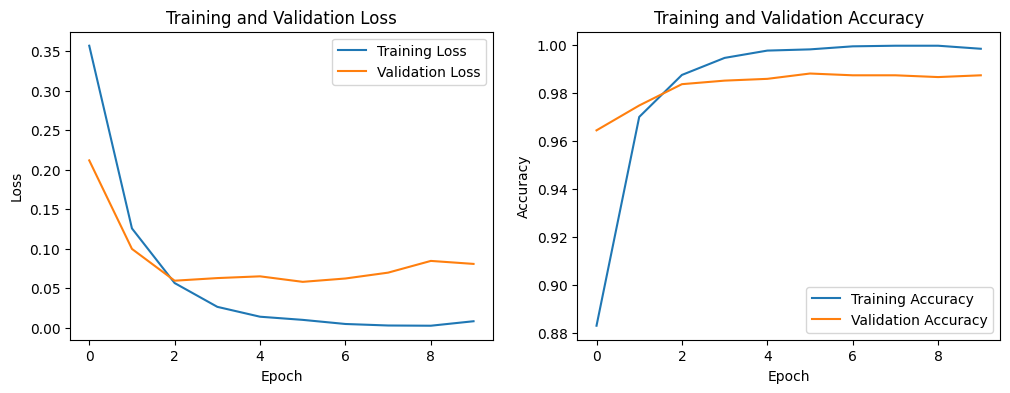

In [16]:
test_loss, test_accuracy = model.evaluate(valid_padded, valid_labels)
print(f"Test accuracy: {test_accuracy:.4f}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  pred_text = pred_text.lower()
  sequence = tokenizer.texts_to_sequences([pred_text])
  padded = pad_sequences(sequence, maxlen=max_length,
                         padding=padding_type,
                         truncating=trunc_type
                         )
  prob = model.predict(padded, verbose=0)[0][0]
  label = "spam" if prob >= 0.5 else "ham"

  return [float(prob), label]

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

[0.00038574961945414543, 'ham']


In [18]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
